<a href="https://colab.research.google.com/github/cedamusk/.py/blob/main/Cross_section.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

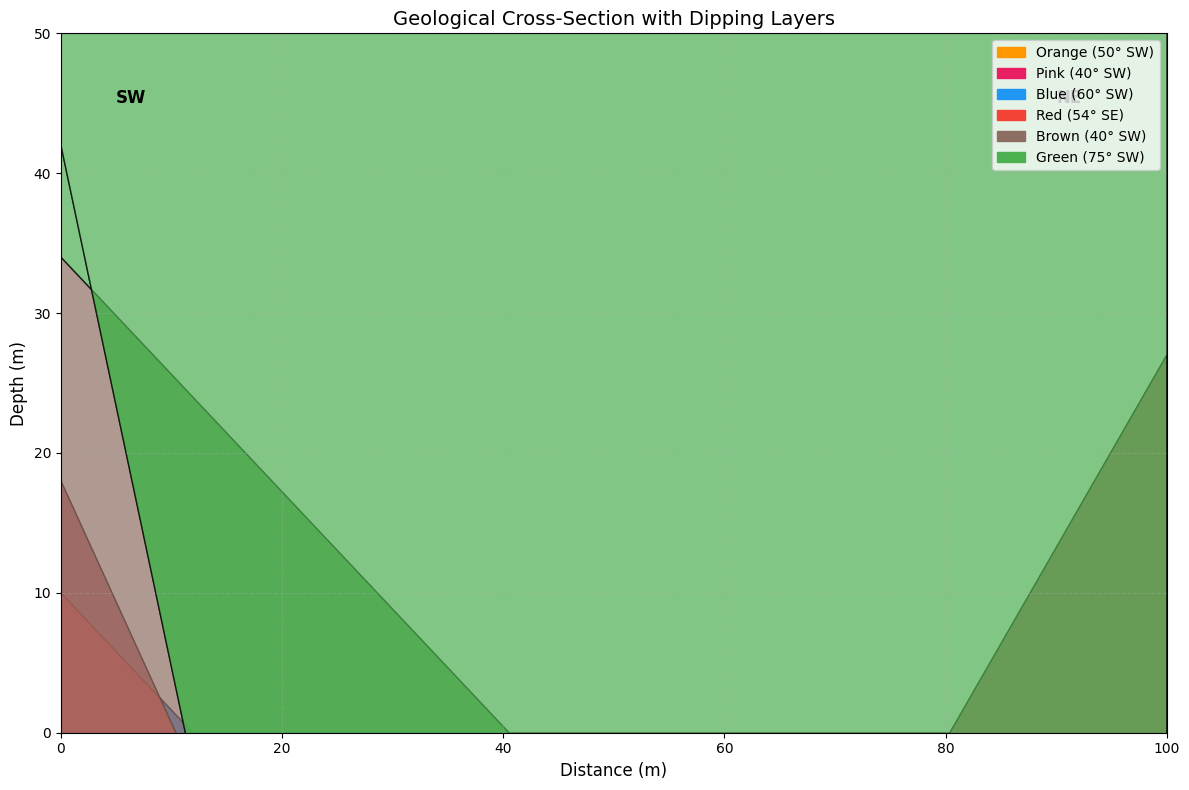

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# Define the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Set the x and y limits for our cross-section
x_min, x_max = 0, 100
y_min, y_max = 0, 50
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Define colors for each rock layer
colors = {
    'green': '#4CAF50',
    'brown': '#8D6E63',
    'red': '#F44336',
    'blue': '#2196F3',
    'pink': '#E91E63',
    'orange': '#FF9800'
}

# Define dip angles (in degrees) and directions
dips = {
    'green': (75, 'SW'),
    'red': (54, 'SE'),
    'blue': (60, 'SW'),
    'pink': (40, 'SW'),
    'orange': (50, 'SW'),
    'brown': (40, 'SW')
}

# Calculate slopes based on dip angles
# For SW dips, negative slope (slope = -tan(dip angle))
# For SE dips, positive slope (slope = tan(dip angle))
slopes = {}
for layer, (angle, direction) in dips.items():
    angle_rad = np.radians(angle)
    if direction == 'SW':
        slopes[layer] = -np.tan(angle_rad)
    else:  # 'SE'
        slopes[layer] = np.tan(angle_rad)

# Define thickness of each layer
thicknesses = {
    'green': 10,
    'brown': 8,
    'red': 7,
    'blue': 9,
    'pink': 8,
    'orange': 10
}

# Define starting points for each layer (from bottom to top)
# We'll start with orange at the bottom
layers = ['orange', 'pink', 'blue', 'red', 'brown', 'green']

# Calculate layer boundaries
boundaries = []
current_y = y_min

for layer in layers:
    # Define points for the layer boundary
    slope = slopes[layer]
    thickness = thicknesses[layer]

    # Create points for the boundary
    x_points = np.linspace(x_min, x_max, 100)

    # For SW dips (negative slope), high point is at x_min
    # For SE dips (positive slope), high point is at x_max
    if slope < 0:  # SW
        y_points = current_y + slope * (x_points - x_min)
    else:  # SE
        y_points = current_y + slope * (x_points - x_max)

    boundaries.append((x_points, y_points))
    current_y += thickness

# Draw the layers
for i in range(len(layers)):
    layer = layers[i]
    color = colors[layer]

    if i == 0:  # Bottom layer
        x_bottom = np.linspace(x_min, x_max, 100)
        y_bottom = np.ones_like(x_bottom) * y_min
        x_top, y_top = boundaries[i]
    else:
        x_bottom, y_bottom = boundaries[i-1]
        x_top, y_top = boundaries[i]

    # Create polygon vertices
    verts = np.column_stack((np.concatenate([x_top, x_bottom[::-1]]),
                            np.concatenate([y_top, y_bottom[::-1]])))

    # Create the polygon
    polygon = patches.Polygon(verts, closed=True, facecolor=color, alpha=0.7,
                             edgecolor='black', linewidth=1)
    ax.add_patch(polygon)

# Add the final layer to the top
x_bottom, y_bottom = boundaries[-1]
y_top = np.ones_like(x_bottom) * y_max
verts = np.column_stack((np.concatenate([x_bottom, x_bottom[::-1]]),
                         np.concatenate([y_top, y_bottom[::-1]])))
polygon = patches.Polygon(verts, closed=True, facecolor=colors[layers[-1]], alpha=0.7,
                         edgecolor='black', linewidth=1)
ax.add_patch(polygon)

# Add labels and a legend
handles = [patches.Patch(color=colors[layer], label=f"{layer.capitalize()} ({dips[layer][0]}° {dips[layer][1]})")
          for layer in layers]
ax.legend(handles=handles, loc='upper right')

# Add compass directions
ax.text(5, y_max-5, 'SW', fontsize=12, fontweight='bold')
ax.text(x_max-10, y_max-5, 'NE', fontsize=12, fontweight='bold')

# Set labels and title
ax.set_xlabel('Distance (m)', fontsize=12)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_title('Geological Cross-Section with Dipping Layers', fontsize=14)

# Add grid
ax.grid(linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

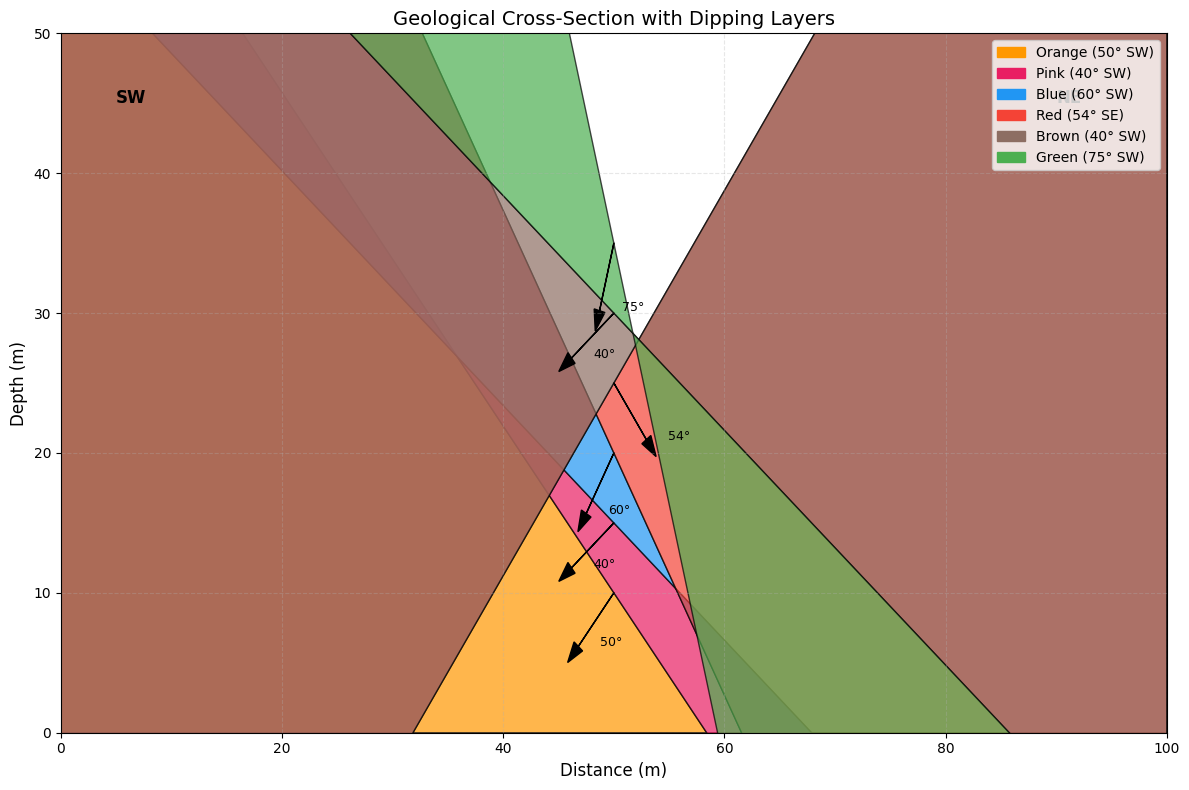

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))
x_min, x_max = 0, 100
y_min, y_max = 0, 50
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Define colors for each rock layer
colors = {
    'orange': '#FF9800',
    'pink': '#E91E63',
    'blue': '#2196F3',
    'red': '#F44336',
    'brown': '#8D6E63',
    'green': '#4CAF50'
}

# Define dip angles (in degrees) and directions
# These represent the angle of the layers relative to horizontal
dips = {
    'orange': (50, 'SW'),
    'pink': (40, 'SW'),
    'blue': (60, 'SW'),
    'red': (54, 'SE'),
    'brown': (40, 'SW'),
    'green': (75, 'SW')
}

# Calculate slopes based on dip angles
slopes = {}
for layer, (angle, direction) in dips.items():
    angle_rad = np.radians(angle)
    if direction == 'SW':
        slopes[layer] = -np.tan(angle_rad)
    else:  # 'SE'
        slopes[layer] = np.tan(angle_rad)

# Define the sequence of layers from bottom to top
layers = ['orange', 'pink', 'blue', 'red', 'brown', 'green']

# Define reference points for each layer interface
# Start with the base of the orange layer at a certain point
reference_points = {}
reference_points['orange'] = (50, 10)  # Starting point (x, y) for the bottom of the first layer

# Calculate reference points for subsequent layers
for i in range(1, len(layers)):
    prev_layer = layers[i-1]
    current_layer = layers[i]

    # Interface between layers occurs where the previous layer's surface is
    # For simplicity, we'll use the middle of the section as reference
    x_ref, y_ref = reference_points[prev_layer]

    # Find the y-value at the reference point using the slope of the previous layer
    # and shift it up by some amount to represent the thickness of that layer
    layer_thickness = 5  # Thickness of each layer

    # Calculate the new reference point based on the previous layer's slope
    # and the desired thickness
    if dips[prev_layer][1] == 'SW':
        # For SW dipping layers
        x_new = x_ref
        y_new = y_ref + layer_thickness
    else:
        # For SE dipping layers
        x_new = x_ref
        y_new = y_ref + layer_thickness

    reference_points[current_layer] = (x_new, y_new)

# Generate coordinates for each layer
layer_polygons = {}
for layer in layers:
    x_ref, y_ref = reference_points[layer]
    slope = slopes[layer]

    # Create the top boundary of the layer
    x_points = np.linspace(x_min, x_max, 100)
    y_top = y_ref + slope * (x_points - x_ref)

    # Create bottom boundary (which is either the previous layer's top or the bottom of the diagram)
    if layer == layers[0]:  # First layer
        y_bottom = np.ones_like(x_points) * y_min
    else:
        prev_layer = layers[layers.index(layer) - 1]
        prev_x_ref, prev_y_ref = reference_points[prev_layer]
        prev_slope = slopes[prev_layer]
        y_bottom = prev_y_ref + prev_slope * (x_points - prev_x_ref)

    # Create polygon vertices
    verts = np.column_stack((np.concatenate([x_points, x_points[::-1]]),
                            np.concatenate([y_top, y_bottom[::-1]])))

    layer_polygons[layer] = verts

# Draw the layers
for layer in layers:
    polygon = patches.Polygon(layer_polygons[layer], closed=True, facecolor=colors[layer],
                             alpha=0.7, edgecolor='black', linewidth=1)
    ax.add_patch(polygon)

# Add a legend
handles = [patches.Patch(color=colors[layer], label=f"{layer.capitalize()} ({dips[layer][0]}° {dips[layer][1]})")
          for layer in layers]
ax.legend(handles=handles, loc='upper right')

# Add compass directions
ax.text(5, y_max-5, 'SW', fontsize=12, fontweight='bold')
ax.text(x_max-10, y_max-5, 'NE', fontsize=12, fontweight='bold')

# Set labels and title
ax.set_xlabel('Distance (m)', fontsize=12)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_title('Geological Cross-Section with Dipping Layers', fontsize=14)

# Add grid
ax.grid(linestyle='--', alpha=0.3)

# Add little marks indicating the dip angle direction
arrow_length = 5
for layer in layers:
    x_ref, y_ref = reference_points[layer]
    angle, direction = dips[layer]
    angle_rad = np.radians(angle)

    if direction == 'SW':
        dx = -arrow_length * np.cos(angle_rad)
        dy = -arrow_length * np.sin(angle_rad)
    else:  # SE
        dx = arrow_length * np.cos(angle_rad)
        dy = -arrow_length * np.sin(angle_rad)

    ax.arrow(x_ref, y_ref, dx, dy, head_width=1, head_length=1.5, fc='black', ec='black')
    ax.text(x_ref + dx + 2, y_ref + dy, f"{angle}°", fontsize=9)

plt.tight_layout()
plt.show()